# Open Data and Government Index Rank Merge - Year 2016

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns

###### Load in csv and create a dataframe

In [4]:
csv_merge = "Resources/merged2016.csv"
df_2016 = pd.read_csv(csv_merge)
df_2016.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364


###### Used the dataframe method to create bar graph of E-Government Rank grouped by region

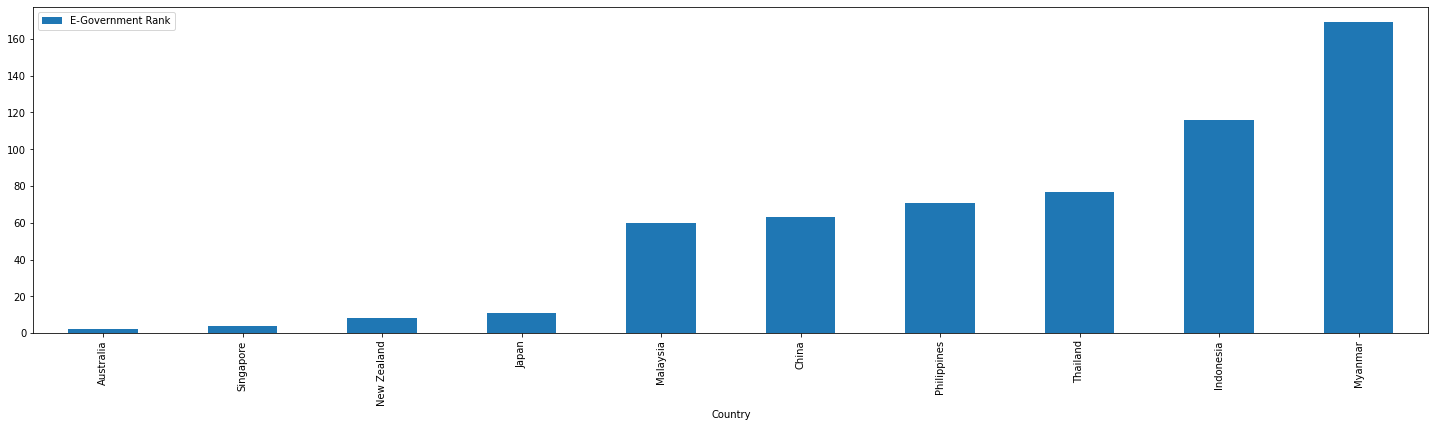

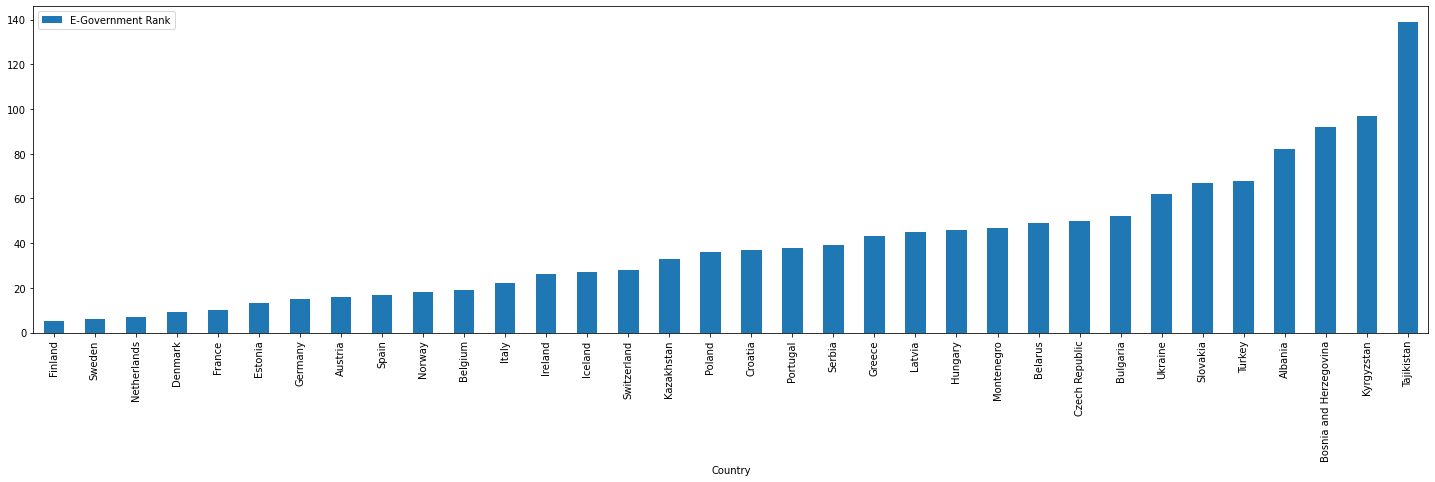

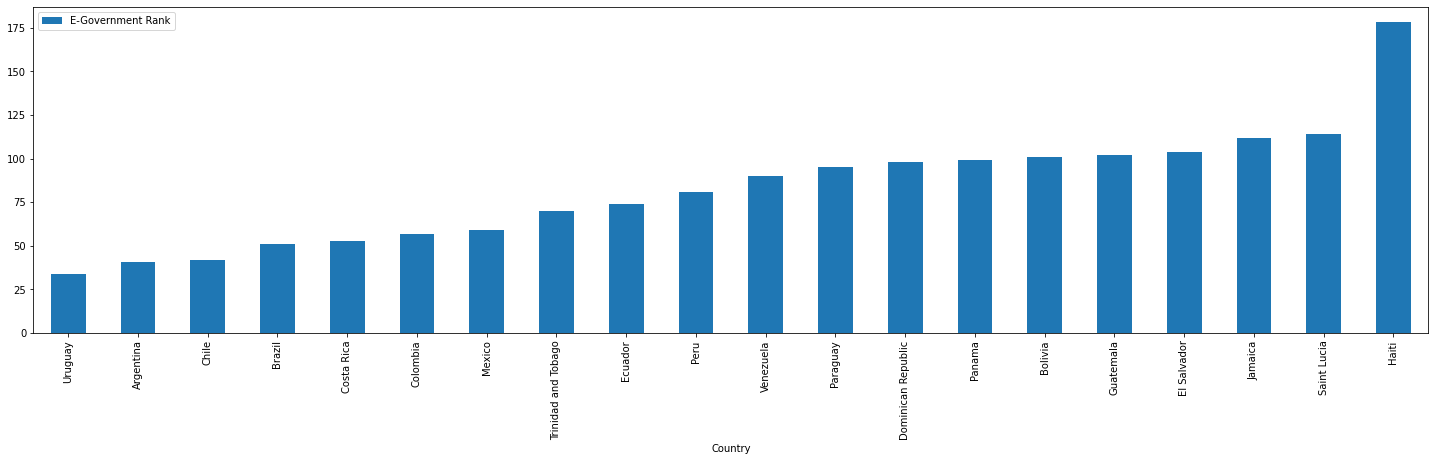

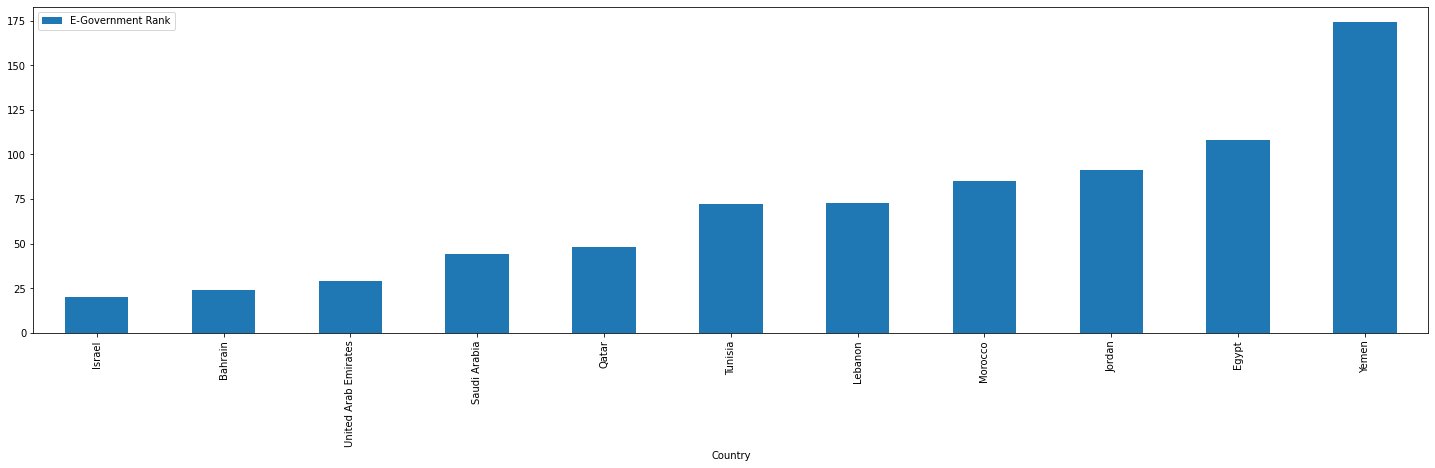

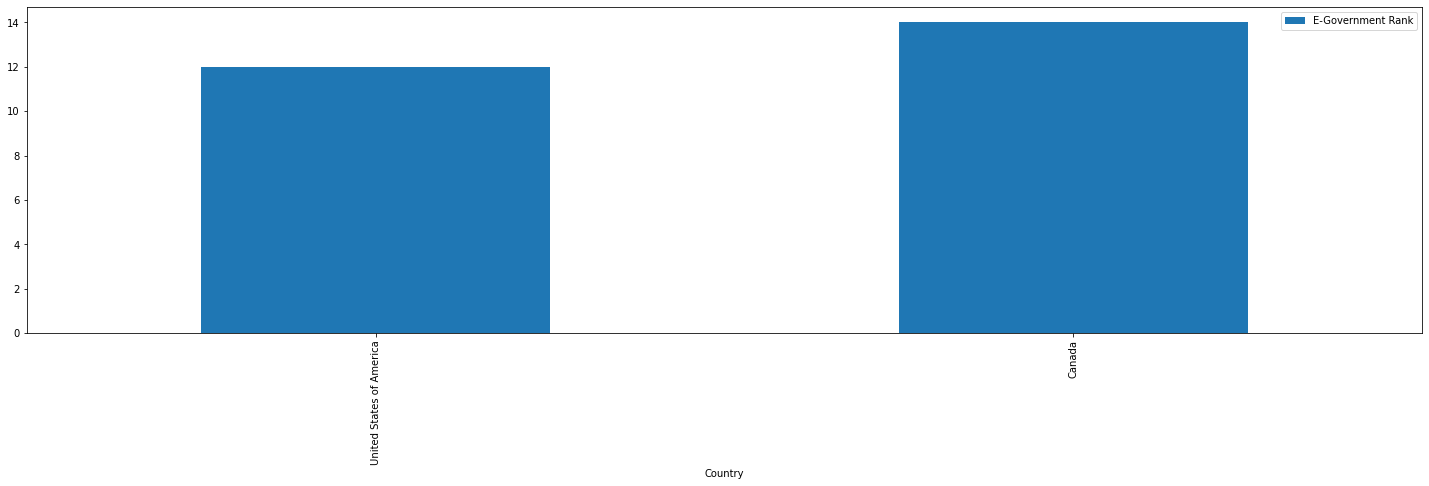

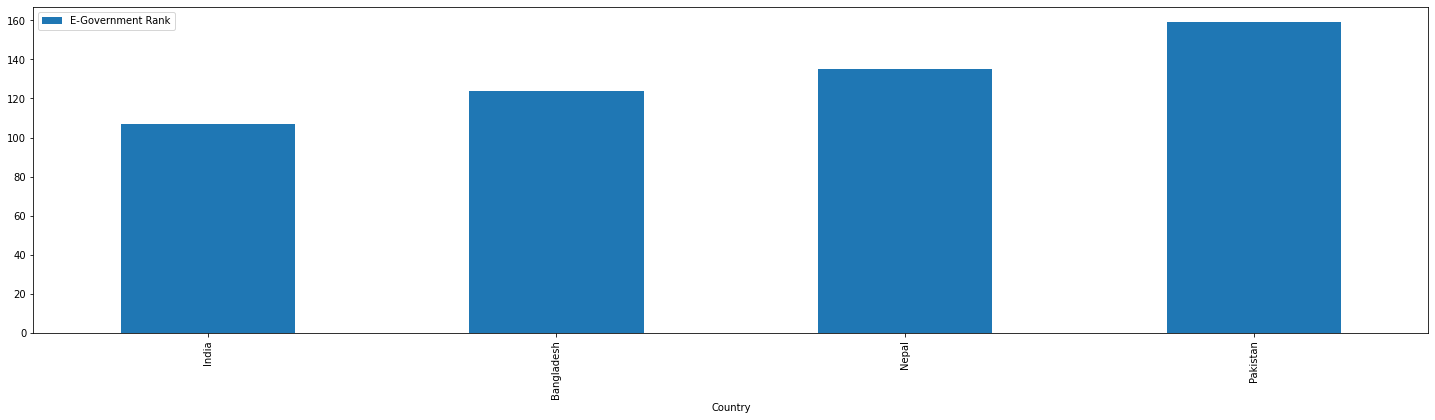

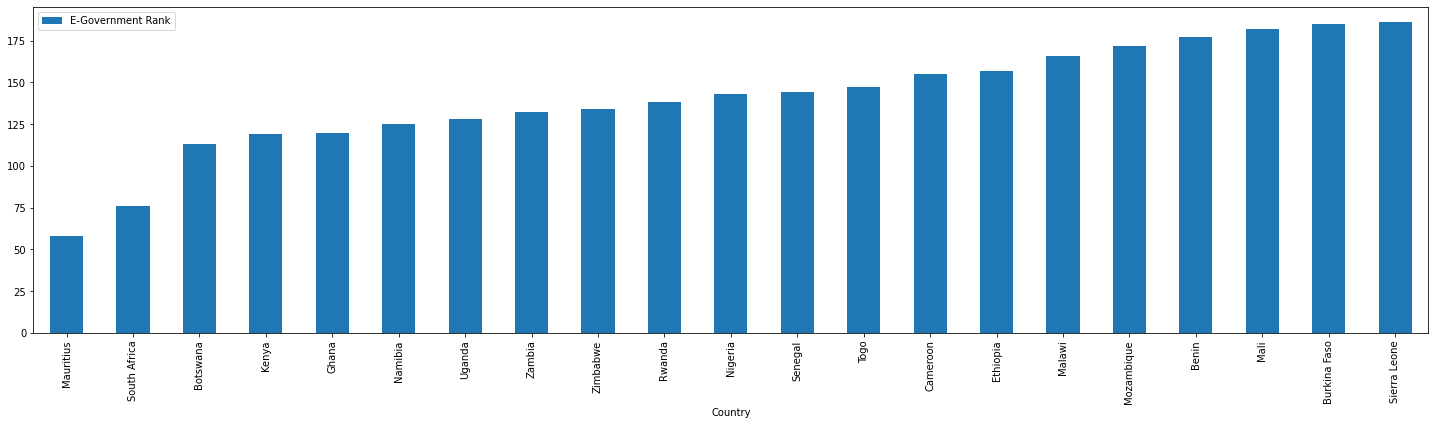

In [5]:
df_2016_sorted = df_2016.sort_values(by = "E-Government Rank")
df_2016_grouped = df_2016_sorted.groupby('Region')
df_2016_grouped.plot.bar(x='Country',y='E-Government Rank',rot=90, figsize=(25,6));

###### Used the dataframe method to create a bar graph of the ODB-Rank grouped by Region

In [6]:
df_2016_sorted = df_2016.sort_values(by = "ODB-Rank")
df_2016_grouped = df_2016_sorted.groupby('Region')
df_2016_grouped.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
5,2016,East Asia & Pacific,JP,JPN,8,Japan,75.16,84,67,60,...,82,80,51,4,11,0.84397,0.98305,0.87681,0.82738,0.82771
6,2016,Europe & Central Asia,NL,NLD,8,Netherlands,74.95,94,59,63,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
7,2016,Europe & Central Asia,NO,NOR,10,Norway,73.81,77,86,70,...,92,20,58,13,18,0.81168,0.76271,0.80435,0.90306,0.72764
8,2016,Europe & Central Asia,ES,ESP,11,Spain,73.36,81,60,61,...,56,40,100,7,17,0.81350,0.93220,0.91304,0.87821,0.64926
9,2016,Latin America & Caribbean,MX,MEX,11,Mexico,73.45,83,58,58,...,100,60,51,6,59,0.61953,0.88136,0.84783,0.69934,0.31143


In [8]:
round(df_2016.describe(),2)

,Year,ODB-Rank,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,Implementation-Accountability-Scaled,Implementation-Rank,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
count,102.0,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,2016.0,57.22,32.35,45.63,33.94,36.21,26.78,57.82,24.29,15.44,16.48,57.56,77.18,0.57,0.59,0.59,0.69,0.43
std,0.0,32.95,23.12,24.14,22.49,20.37,16.46,32.92,26.34,23.85,20.24,33.38,52.61,0.20,0.23,0.24,0.19,0.23
min,2016.0,2.00,0.00,0.00,6.00,5.00,6.00,2.00,0.00,0.00,0.00,2.00,2.00,0.16,0.07,0.09,0.17,0.05
25%,2016.0,29.00,13.88,26.25,13.00,20.00,11.00,30.25,0.00,0.00,0.00,28.25,34.50,0.45,0.44,0.44,0.56,0.25
50%,2016.0,55.50,27.15,44.00,29.00,34.00,23.00,57.50,17.00,0.00,8.00,57.50,69.00,0.58,0.59,0.61,0.71,0.41
75%,2016.0,85.00,45.18,61.75,52.75,51.00,38.75,85.75,37.00,20.00,30.25,85.75,115.50,0.72,0.76,0.77,0.84,0.61
max,2016.0,114.00,89.54,100.00,87.00,87.00,86.00,114.00,100.00,100.00,100.00,115.00,186.00,0.91,0.98,0.98,1.00,0.84


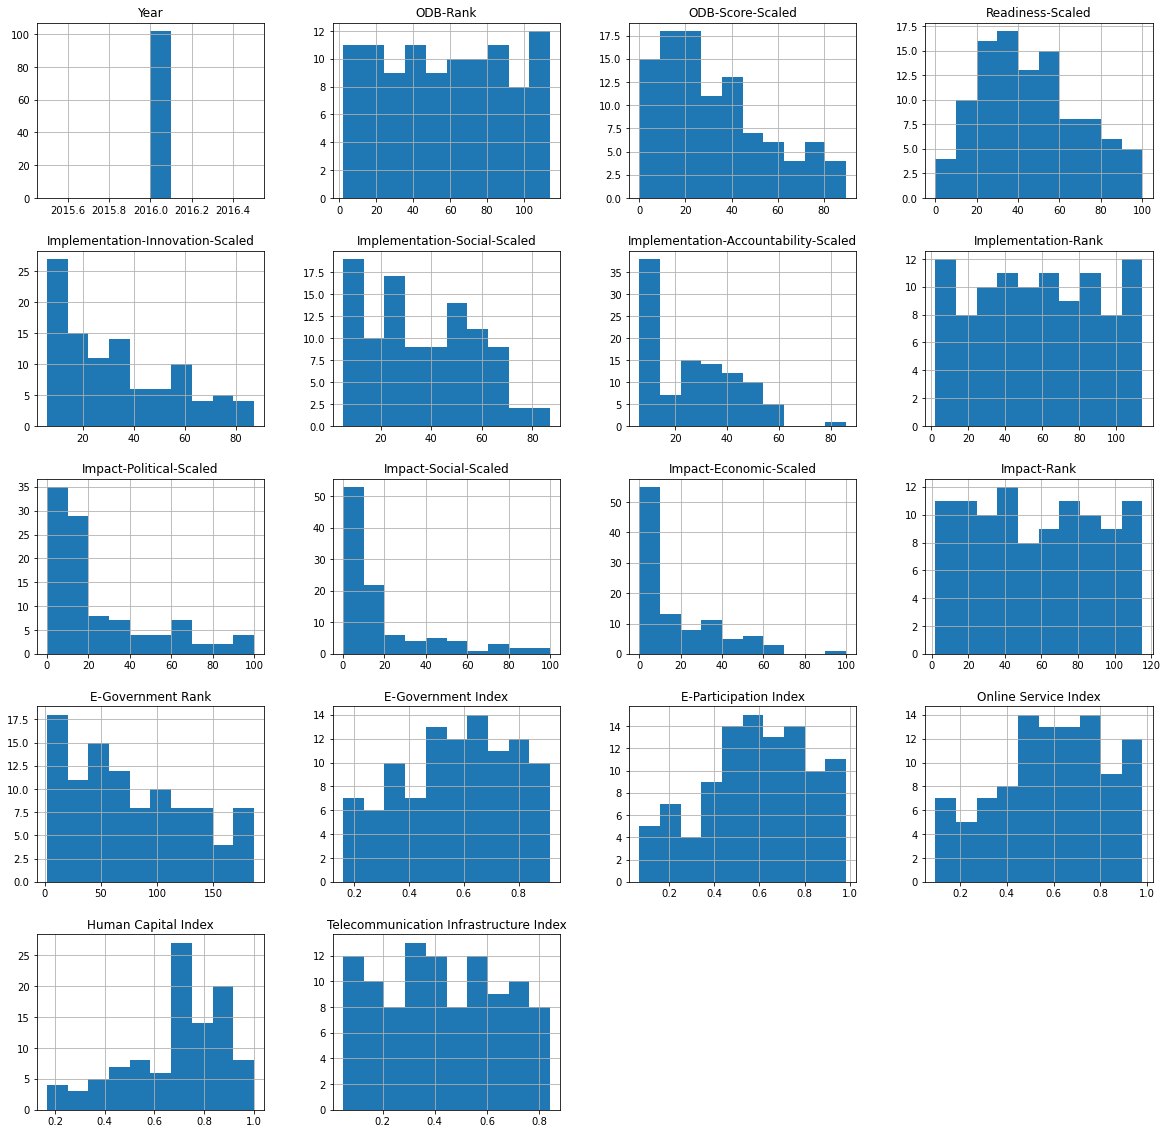

In [9]:
df_2016.hist(alpha=1, figsize=(20,20));

###### E participation and human capital and egov rank LINEAR REGRESSION

In [11]:
x_axis1 = df_2016['E-Government Index']
y_axis1 = df_2016['E-Participation Index']
x_axis2 = df_2016['E-Government Index']
y_axis2 = df_2016['Human Capital Index']
x_axis3 = df_2016['E-Government Index']
y_axis3 = df_2016['Telecommunication Infrastructure Index']

In [12]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#Linear regression x3
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_axis3, y_axis3)
regress_values3 = x_axis3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

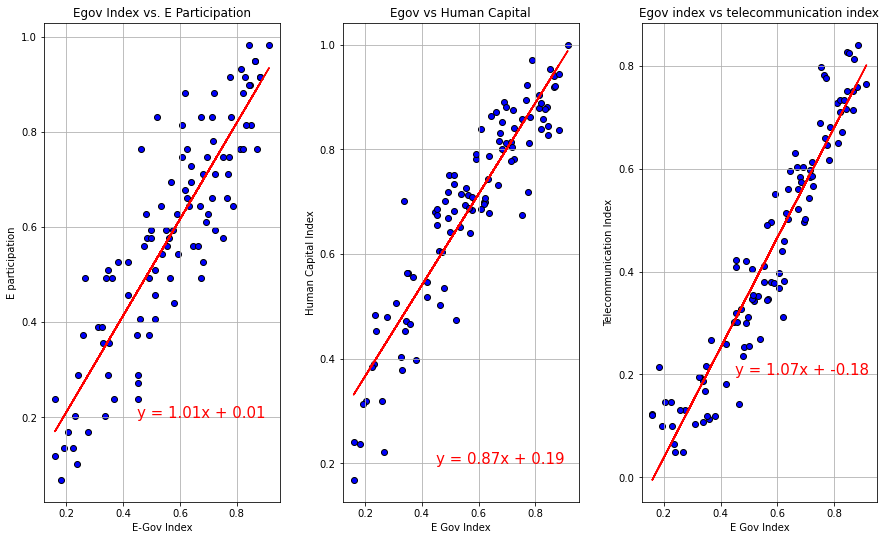

In [15]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (13,8), nrows=1, ncols =3);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
ax3.scatter(x_axis3, y_axis3, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('E-Gov Index');
ax1.set_ylabel('E participation');
ax1.set_title("Egov Index vs. E Participation");
ax2.set_xlabel('E Gov Index');
ax2.set_ylabel('Human Capital Index');
ax2.set_title("Egov vs Human Capital");
ax3.set_xlabel('E Gov Index');
ax3.set_ylabel('Telecommunication Index');
ax3.set_title("Egov index vs telecommunication index");

#Grid
ax1.grid()
ax2.grid()
ax3.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(.45,.2),fontsize=15,color="red");
ax2.annotate(line_eq2, (.45,.2), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");
ax3.annotate(line_eq3, (.45,.2), fontsize=15, color="red")
ax3.plot(x_axis3,regress_values3,"r-");

###### Readiness vs. ODB Score Scaled

In [17]:
x_axis1 = df_2016['ODB-Score-Scaled']
y_axis1 = df_2016['Readiness-Scaled']

In [18]:
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

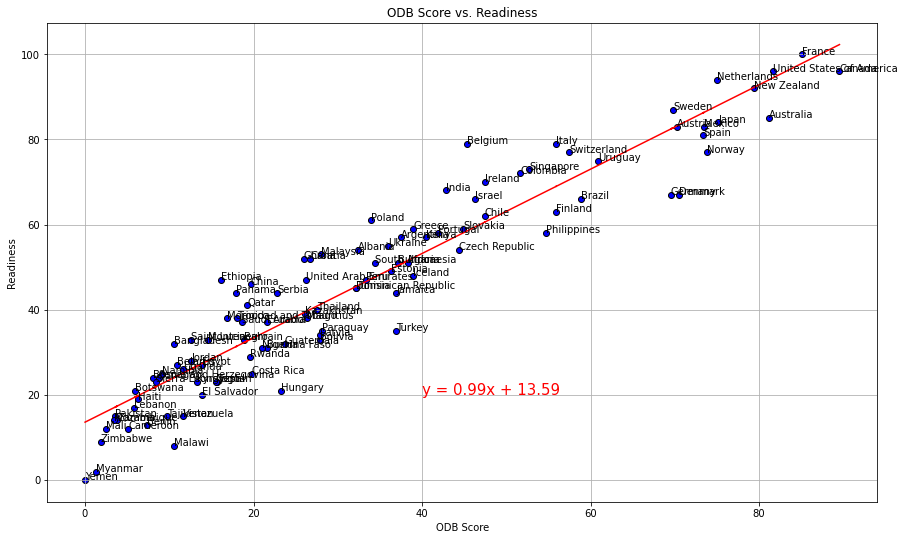

In [21]:
#Graph North and South Max temp versus latitude using multiple subplots
fig, ax1 = plt.subplots(figsize = (13,8));
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Score');
ax1.set_ylabel('Readiness');
ax1.set_title("ODB Score vs. Readiness");


#Grid
ax1.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(40,20),fontsize=15,color="red");
ax1.plot(x_axis1,regress_values1,"r-");

for i, label in enumerate(df_2016['Country']):
    plt.text(x_axis1[i], y_axis1[i],label)

###### Graphs for Egov/ODB Rank and ODBScore/EgovIndex*100

In [22]:
x_axis1 = df_2016['ODB-Rank']
y_axis1 = df_2016['E-Government Rank']
x_axis2 = df_2016['ODB-Score-Scaled']
y_axis2 = df_2016['E-Government Index'] *100

In [23]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

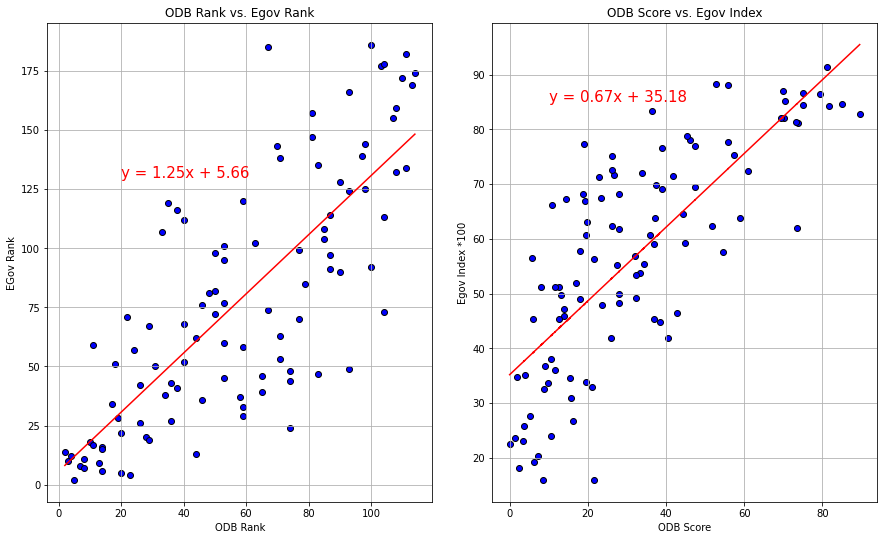

In [25]:
#Graph 
fig, (ax1, ax2) = plt.subplots(figsize = (13,8), nrows=1, ncols =2);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")

fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Rank');
ax1.set_ylabel('EGov Rank');
ax1.set_title("ODB Rank vs. Egov Rank");
ax2.set_xlabel('ODB Score');
ax2.set_ylabel('Egov Index *100');
ax2.set_title("ODB Score vs. Egov Index");

#Grid
ax1.grid()
ax2.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(20,130),fontsize=15,color="red");
ax2.annotate(line_eq2, (10,85), fontsize=15, color="red");
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");

###### Graphs for ODB Rank

In [27]:
#Set variables
x_axis1 = df_2016['ODB-Rank']
y_axis1 = df_2016['Implementation-Innovation-Scaled']
x_axis2 = df_2016['ODB-Rank']
y_axis2 = df_2016['Impact-Social-Scaled']
x_axis3 = df_2016['ODB-Rank']
y_axis3 = df_2016['Impact-Economic-Scaled']

In [28]:
#Linear regression x1
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_axis1, y_axis1)
regress_values1 = x_axis1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))

#Linear regression x2
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)
regress_values2 = x_axis2 * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

#Linear regression x3
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_axis3, y_axis3)
regress_values3 = x_axis3 * slope3 + intercept3
line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

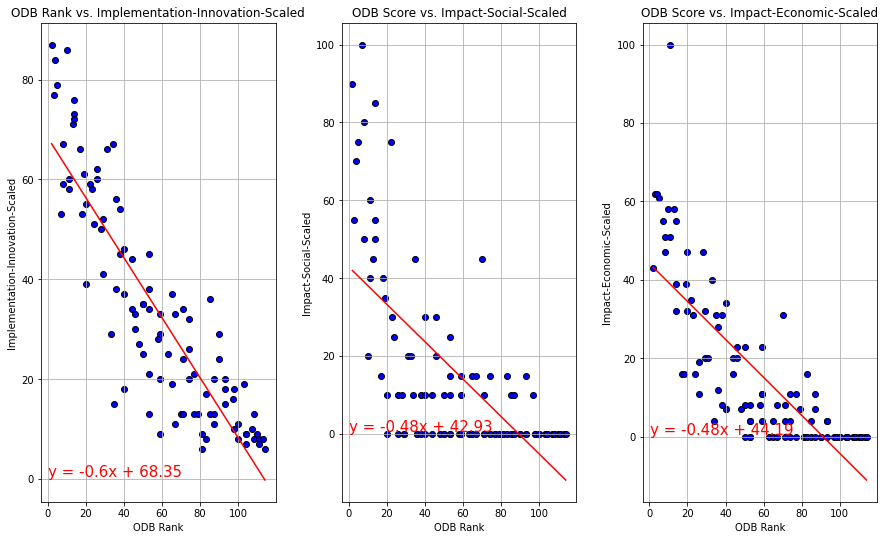

In [29]:
#Graph 
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (13,8), nrows=1, ncols =3);
ax1.scatter(x_axis1, y_axis1, marker="o", facecolors="blue", edgecolors="black")
ax2.scatter(x_axis2, y_axis2, marker="o", facecolors="blue", edgecolors="black")
ax3.scatter(x_axis3, y_axis3, marker="o", facecolors="blue", edgecolors="black")
fig.tight_layout(pad=4)

#Set Labels on graph
ax1.set_xlabel('ODB Rank');
ax1.set_ylabel('Implementation-Innovation-Scaled');
ax1.set_title("ODB Rank vs. Implementation-Innovation-Scaled");
ax2.set_xlabel('ODB Rank');
ax2.set_ylabel('Impact-Social-Scaled');
ax2.set_title("ODB Score vs. Impact-Social-Scaled");
ax3.set_xlabel('ODB Rank');
ax3.set_ylabel('Impact-Economic-Scaled');
ax3.set_title("ODB Score vs. Impact-Economic-Scaled");

#Grid
ax1.grid()
ax2.grid()
ax3.grid()

#Line of best fit equation and plotting the line
ax1.annotate(line_eq1,(.2,.5),fontsize=15,color="red");
ax2.annotate(line_eq2, (.2,.5), fontsize=15, color="red");
ax3.annotate(line_eq3, (.2,.5), fontsize=15, color="red")
ax1.plot(x_axis1,regress_values1,"r-");
ax2.plot(x_axis2,regress_values2,"r-");
ax3.plot(x_axis3,regress_values3,"r-");

###### Bar graph using the DF method for Implementation-Innovation-Scaled grouped by Region

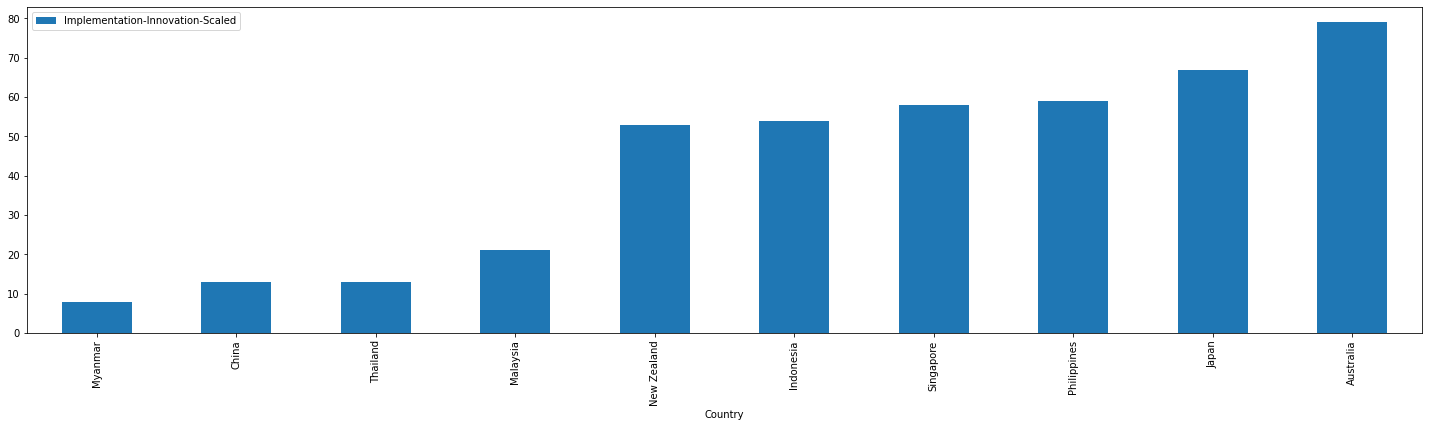

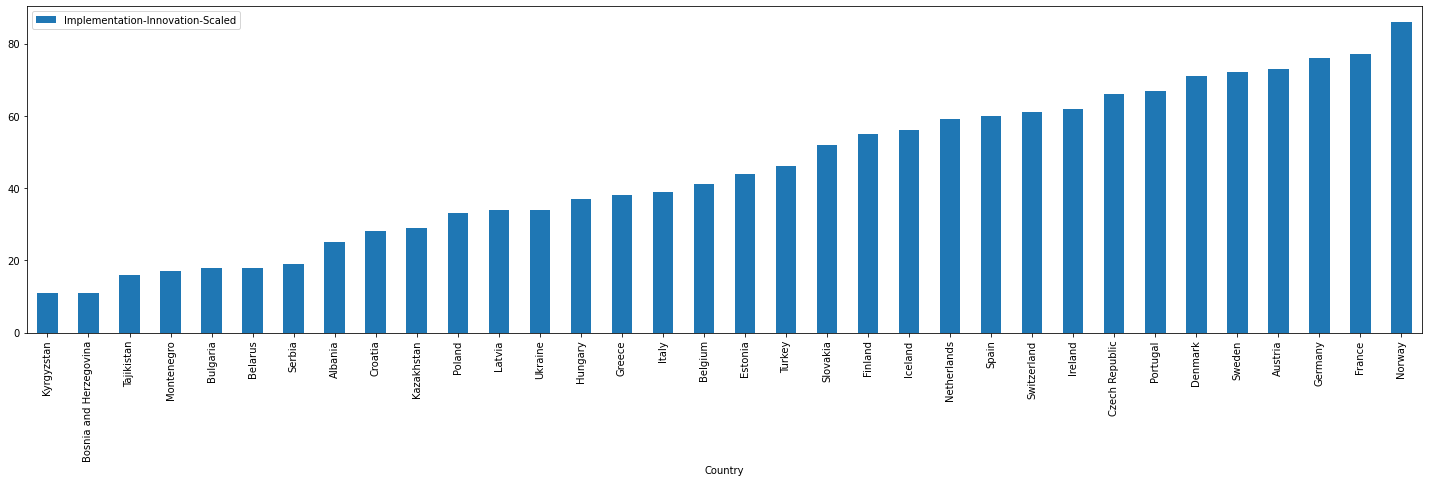

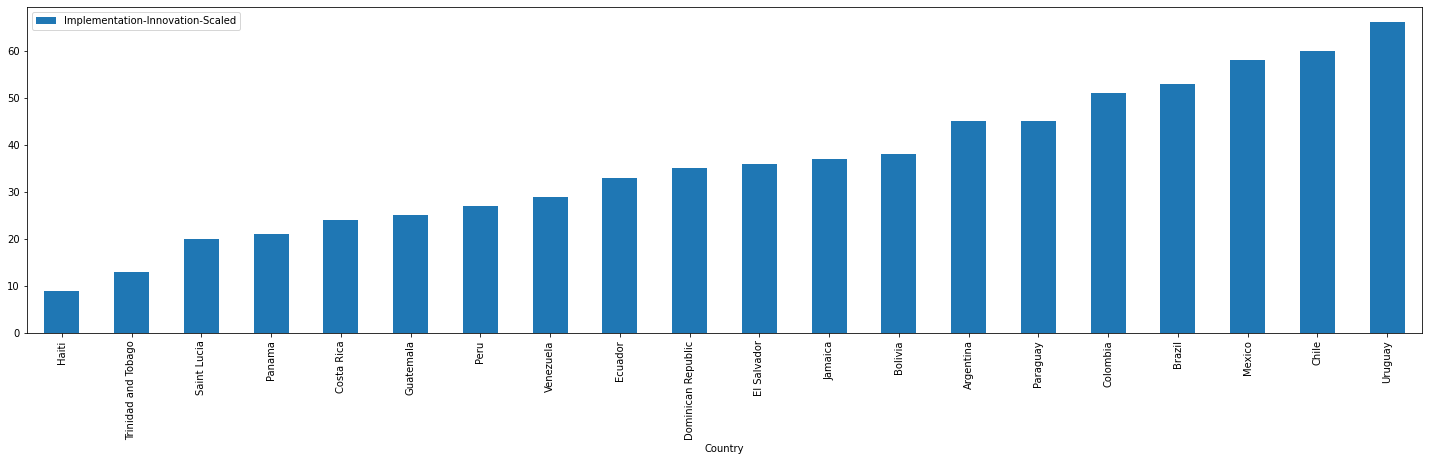

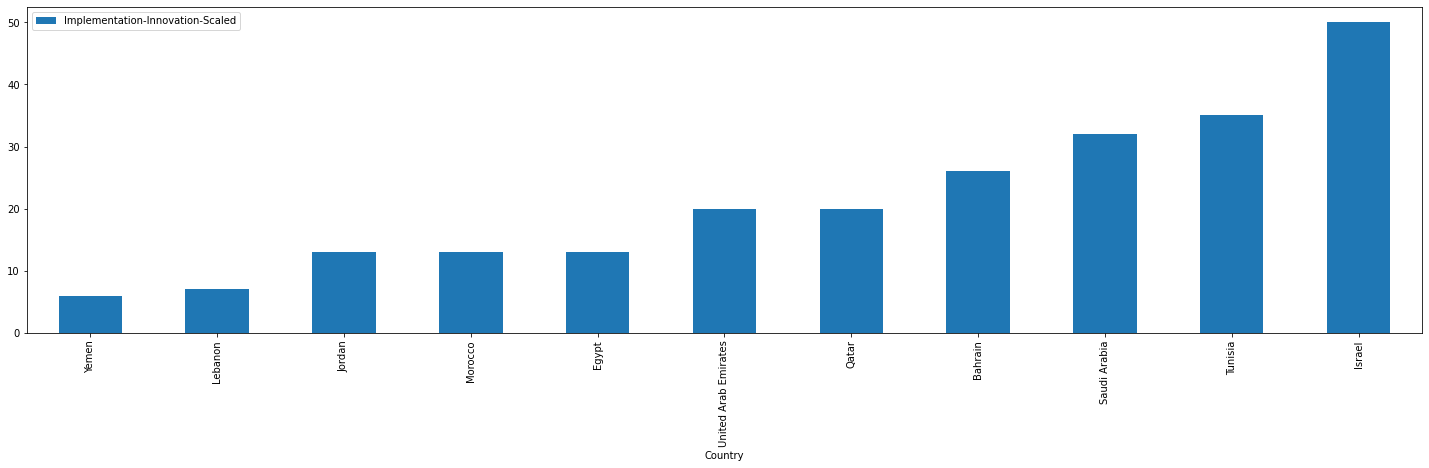

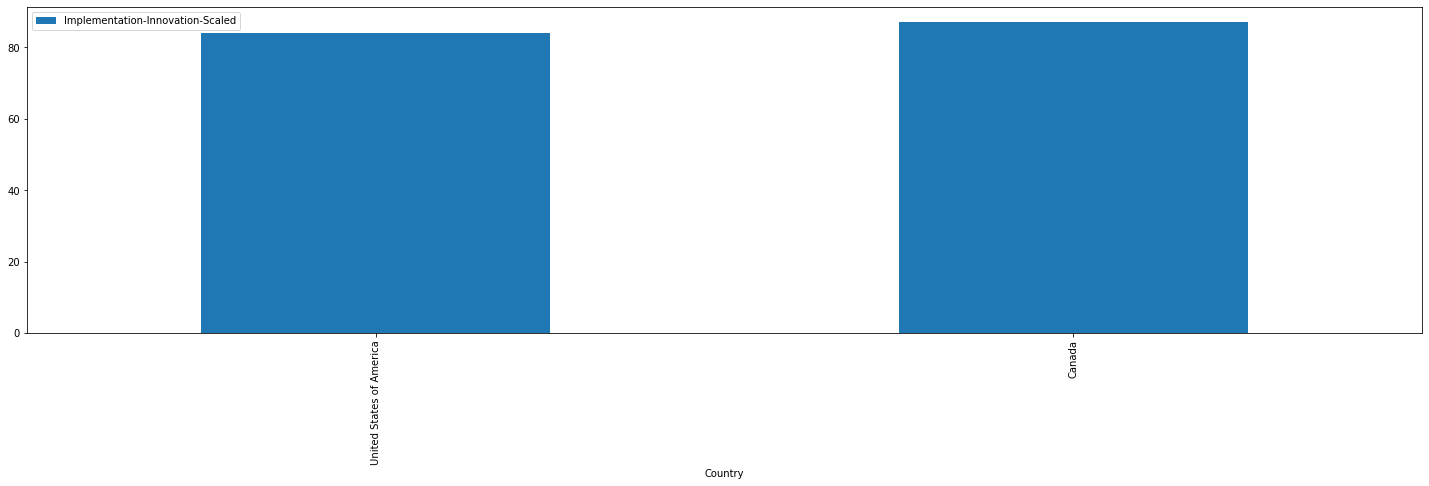

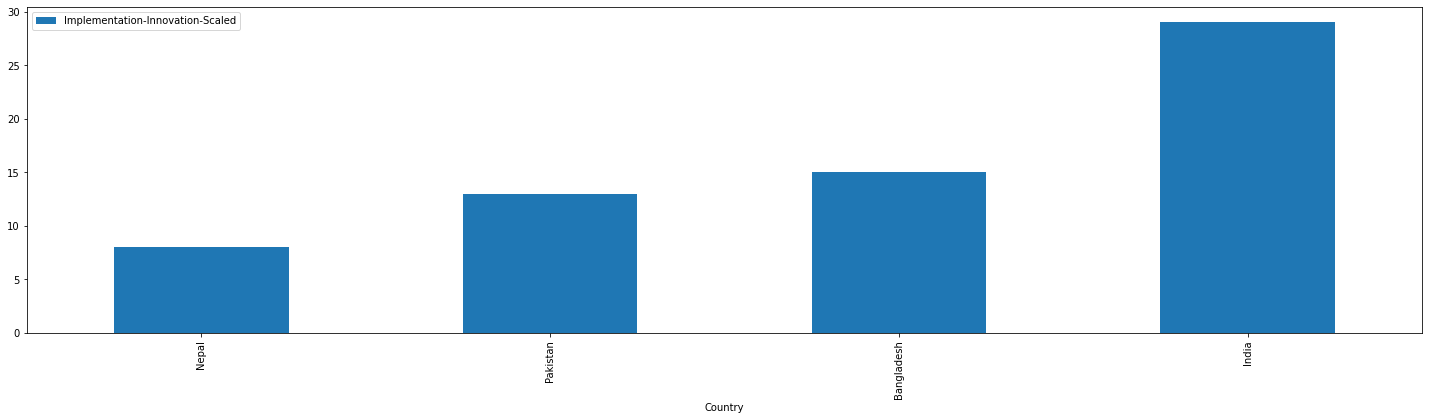

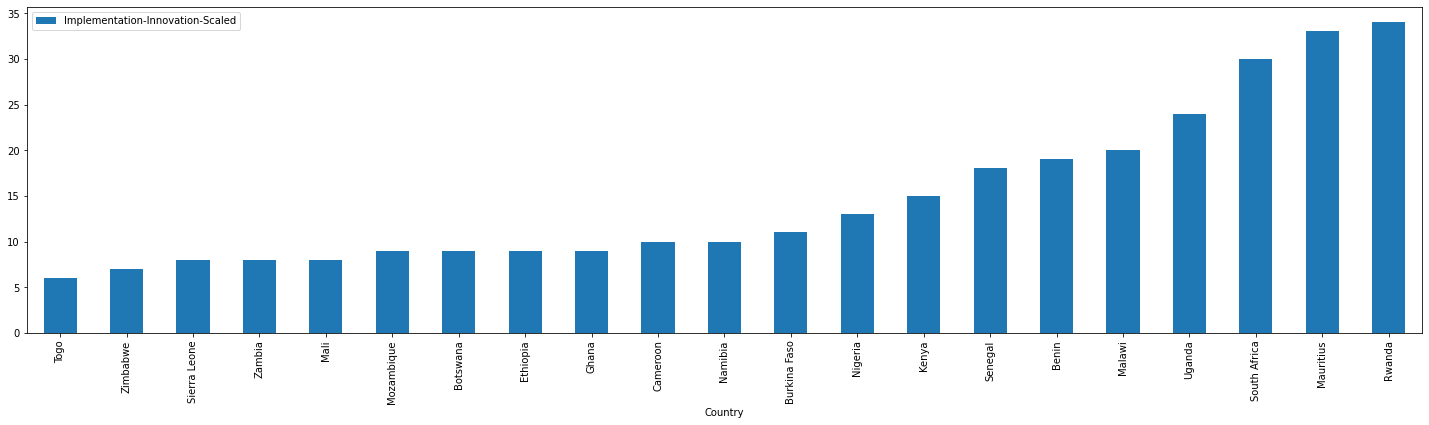

In [30]:
df_2016_imp = df_2016.sort_values(['Implementation-Innovation-Scaled'],ascending=True).groupby('Region').plot(kind='bar',x='Country',y='Implementation-Innovation-Scaled', figsize=(25,6));
df_2016_imp;